In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the data
df = pd.read_csv('HR_Analytics.csv')
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [3]:
# Inspect the data
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
Training

In [4]:
df = df.dropna()
df.info()  # To check if the missing values are dropped

<class 'pandas.core.frame.DataFrame'>
Index: 1423 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1423 non-null   object 
 1   Age                       1423 non-null   int64  
 2   AgeGroup                  1423 non-null   object 
 3   Attrition                 1423 non-null   object 
 4   BusinessTravel            1423 non-null   object 
 5   DailyRate                 1423 non-null   int64  
 6   Department                1423 non-null   object 
 7   DistanceFromHome          1423 non-null   int64  
 8   Education                 1423 non-null   int64  
 9   EducationField            1423 non-null   object 
 10  EmployeeCount             1423 non-null   int64  
 11  EmployeeNumber            1423 non-null   int64  
 12  EnvironmentSatisfaction   1423 non-null   int64  
 13  Gender                    1423 non-null   object 
 14  HourlyRate   

In [5]:
# Check for duplicates
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

df = df.drop_duplicates()
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows: 7
Number of duplicate rows after removal: 0


In [6]:
df.nunique()

EmpID                       1413
Age                           43
AgeGroup                       5
Attrition                      2
BusinessTravel                 4
DailyRate                    867
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1413
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1303
SalarySlab                     4
MonthlyRate                 1373
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptio

In [7]:
# Identify columns with less than 10 unique values
categorical_columns = [col for col in df.columns if df[col].nunique() < 10]

# Display unique values for each categorical column
for col in categorical_columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print()

Column: AgeGroup
['18-25' '26-35' '36-45' '46-55' '55+']

Column: Attrition
['Yes' 'No']

Column: BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' 'TravelRarely']

Column: Department
['Research & Development' 'Sales' 'Human Resources']

Column: Education
[3 2 1 4 5]

Column: EducationField
['Life Sciences' 'Medical' 'Marketing' 'Technical Degree' 'Other'
 'Human Resources']

Column: EmployeeCount
[1]

Column: EnvironmentSatisfaction
[3 4 2 1]

Column: Gender
['Male' 'Female']

Column: JobInvolvement
[3 2 1 4]

Column: JobLevel
[1 2 3 4 5]

Column: JobRole
['Laboratory Technician' 'Sales Representative' 'Research Scientist'
 'Human Resources' 'Manufacturing Director' 'Sales Executive'
 'Healthcare Representative' 'Research Director' 'Manager']

Column: JobSatisfaction
[3 2 4 1]

Column: MaritalStatus
['Single' 'Divorced' 'Married']

Column: SalarySlab
['Upto 5k' '5k-10k' '10k-15k' '15k+']

Column: Over18
['Y']

Column: OverTime
['No' 'Yes']

Column: PerformanceRating
[3 

In [8]:
# Identify columns with only one unique value
columns_to_drop = [col for col in df.columns if df[col].nunique() == 1]

# Drop the identified columns
df = df.drop(columns=columns_to_drop)

# Display the remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1416 entries, 0 to 1479
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1416 non-null   object 
 1   Age                       1416 non-null   int64  
 2   AgeGroup                  1416 non-null   object 
 3   Attrition                 1416 non-null   object 
 4   BusinessTravel            1416 non-null   object 
 5   DailyRate                 1416 non-null   int64  
 6   Department                1416 non-null   object 
 7   DistanceFromHome          1416 non-null   int64  
 8   Education                 1416 non-null   int64  
 9   EducationField            1416 non-null   object 
 10  EmployeeNumber            1416 non-null   int64  
 11  EnvironmentSatisfaction   1416 non-null   int64  
 12  Gender                    1416 non-null   object 
 13  HourlyRate                1416 non-null   int64  
 14  JobInvolvemen

In [9]:
df['BusinessTravel'] = df['BusinessTravel'].replace('TravelRarely', 'Travel_Rarely')
df['BusinessTravel'].unique()  # To verify the changes

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [10]:
# Display the summary statistics of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1416.0,36.924435,9.135606,18.0,30.00,36.0,43.00,60.0
DailyRate,1416.0,803.329802,404.133280,102.0,465.00,804.5,1159.00,1499.0
DistanceFromHome,1416.0,9.238701,8.122617,1.0,2.00,7.0,14.00,29.0
Education,1416.0,2.907486,1.024395,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1416.0,1058.739407,592.701115,1.0,548.75,1058.0,1581.25,2068.0
EnvironmentSatisfaction,1416.0,2.725989,1.090169,1.0,2.00,3.0,4.00,4.0
HourlyRate,1416.0,65.989407,20.396197,30.0,48.00,66.0,84.00,100.0
JobInvolvement,1416.0,2.726695,0.711953,1.0,2.00,3.0,3.00,4.0
JobLevel,1416.0,2.069209,1.108023,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1416.0,2.728814,1.099266,1.0,2.00,3.0,4.00,4.0


In [ ]:
df['Attrition'].unique()

df['Attrition_Encoded'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0).astype(int)
df['Attrition_Encoded'].dtype

array([1, 0])

Overall Attrition Rate: 16.17%


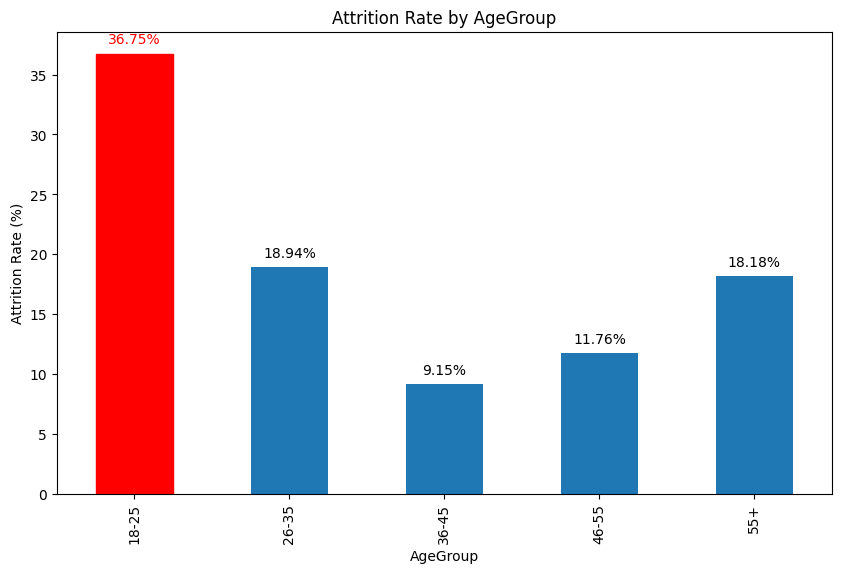

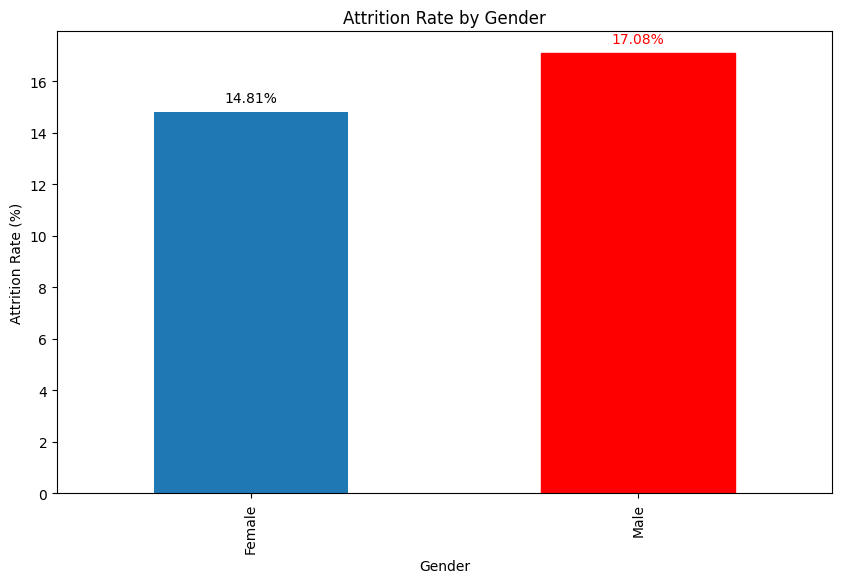

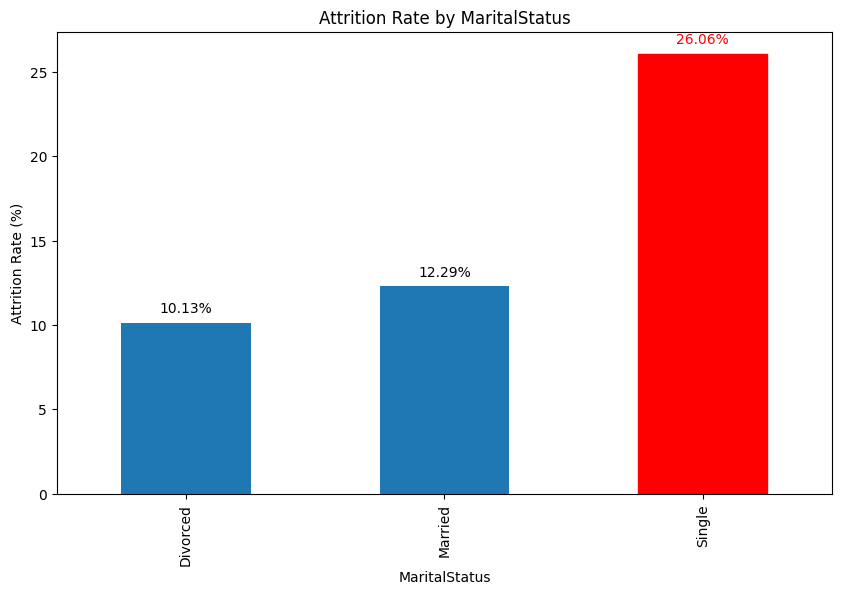

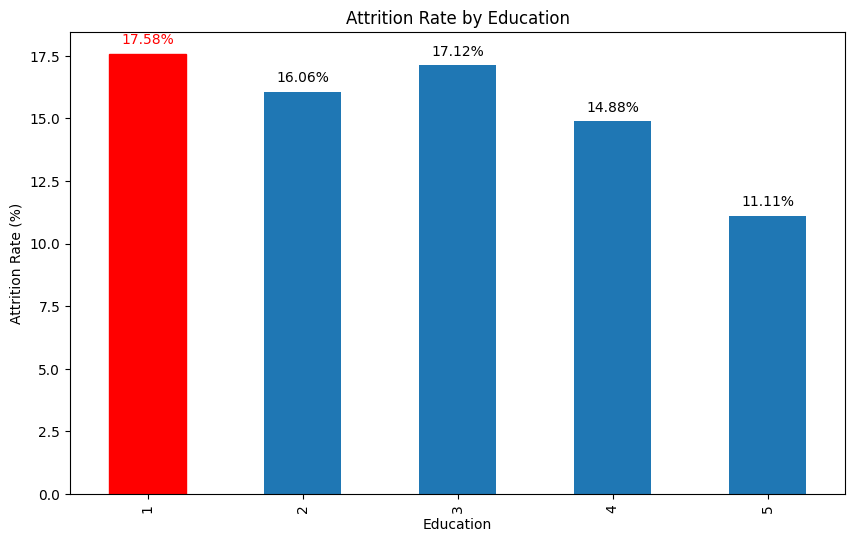

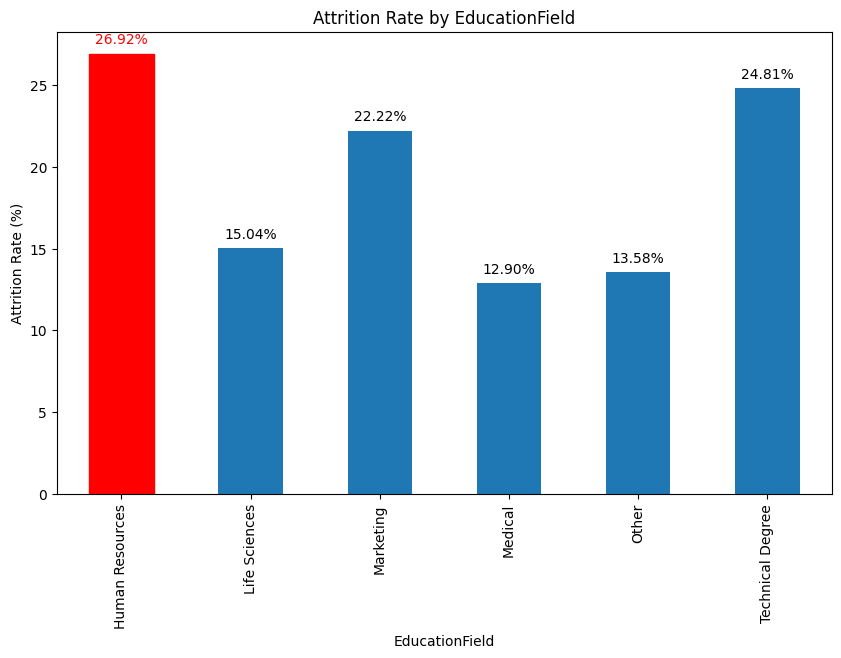

In [36]:
# Calculate overall attrition rate
attrition_rate = df['Attrition_Encoded'].mean() * 100
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")
demographics = ['AgeGroup', 'Gender', 'MaritalStatus', 'Education', 'EducationField']

for demographic in demographics:
    attrition_rate_by_demo = df.groupby(demographic)['Attrition_Encoded'].mean() * 100
    ax = attrition_rate_by_demo.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Attrition Rate by {demographic}')
    plt.xlabel(demographic)
    plt.ylabel('Attrition Rate (%)')
    
    # Add data labels and highlight the highest value
    max_value = attrition_rate_by_demo.max()
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                    color='red' if height == max_value else 'black')
        if height == max_value:
            p.set_color('red')
    
    #plt.tight_layout()
    plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

# Update the categorical_columns list with only the remaining columns in the dataframe
categorical_columns = [col for col in categorical_columns if col in df.columns]

# Display the updated categorical columns
print(categorical_columns)

# Create a copy of the dataframe for label encoding
df_encoded = df.copy()

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Display the first few rows of the encoded dataframe
df_encoded.head()

['AgeGroup', 'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'SalarySlab', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance']


,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,0,1,2,230,1,3,2,1,...,0,2,0,0,2,2,0,0,0,0.0
1,RM302,18,0,0,2,812,2,10,2,3,...,0,0,0,0,2,2,0,0,0,0.0
2,RM458,18,0,1,1,1306,2,5,2,2,...,0,3,0,0,3,2,0,0,0,0.0
3,RM728,18,0,0,0,287,1,5,1,1,...,0,3,0,0,2,2,0,0,0,0.0
4,RM829,18,0,1,0,247,1,8,0,3,...,0,3,0,0,0,2,0,0,0,0.0


In [21]:
df_encoded = df_encoded.drop(columns=['EmpID'])
df_encoded.head()

,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,18,0,1,2,230,1,3,2,1,405,...,0,2,0,0,2,2,0,0,0,0.0
1,18,0,0,2,812,2,10,2,3,411,...,0,0,0,0,2,2,0,0,0,0.0
2,18,0,1,1,1306,2,5,2,2,614,...,0,3,0,0,3,2,0,0,0,0.0
3,18,0,0,0,287,1,5,1,1,1012,...,0,3,0,0,2,2,0,0,0,0.0
4,18,0,1,0,247,1,8,0,3,1156,...,0,3,0,0,0,2,0,0,0,0.0


<Figure size 1000x600 with 0 Axes>

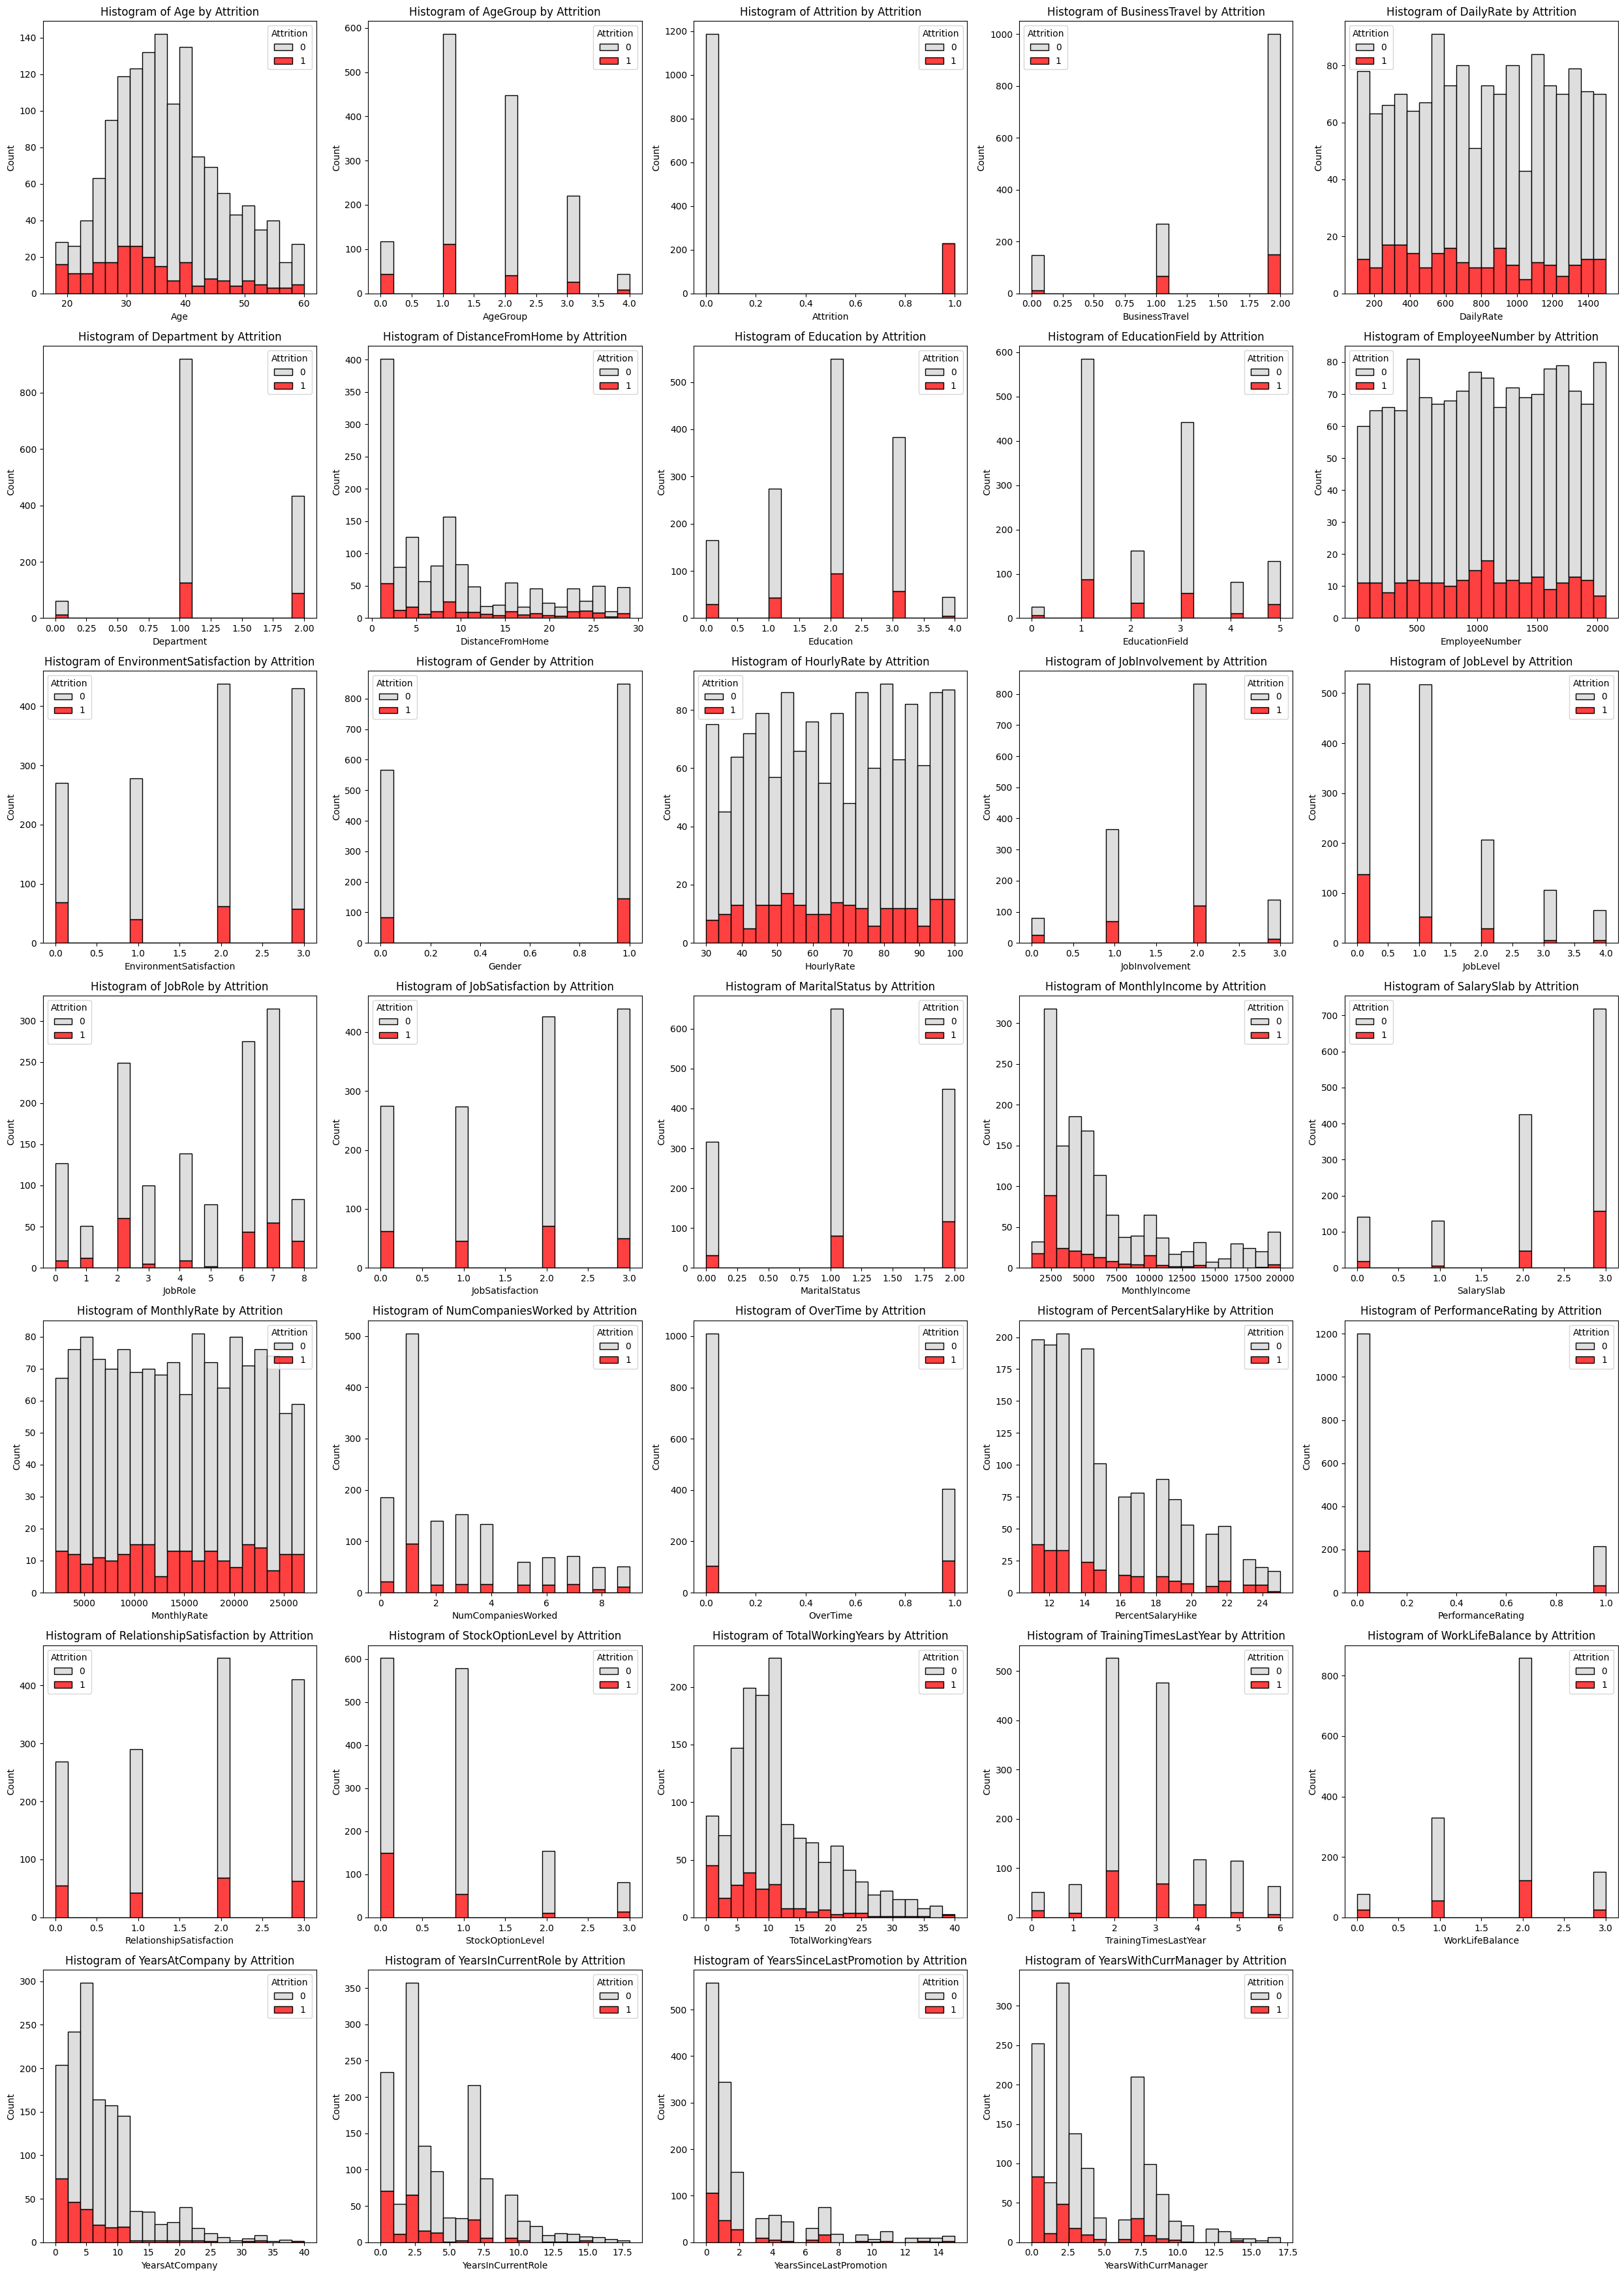

In [50]:
plt.figure(figsize=(10, 6))
num_columns = len(df_encoded.columns)
num_rows = (num_columns + 4) // 5  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 5, figsize=(25, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(df_encoded.columns):
    sns.histplot(data=df_encoded, x=column, hue='Attrition', multiple='stack', bins=20, edgecolor='black', palette={0: 'lightgrey', 1: 'red'}, ax=axes[i])
    axes[i].set_title(f'Histogram of {column} by Attrition')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

/var/folders/y5/gyyt5nkd0pq7tbshmn330gw00000gn/T/ipykernel_11454/850305839.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_corr_sorted_no_attrition['Absolute Correlation'] = attrition_corr_sorted_no_attrition['Correlation with Attrition'].abs()


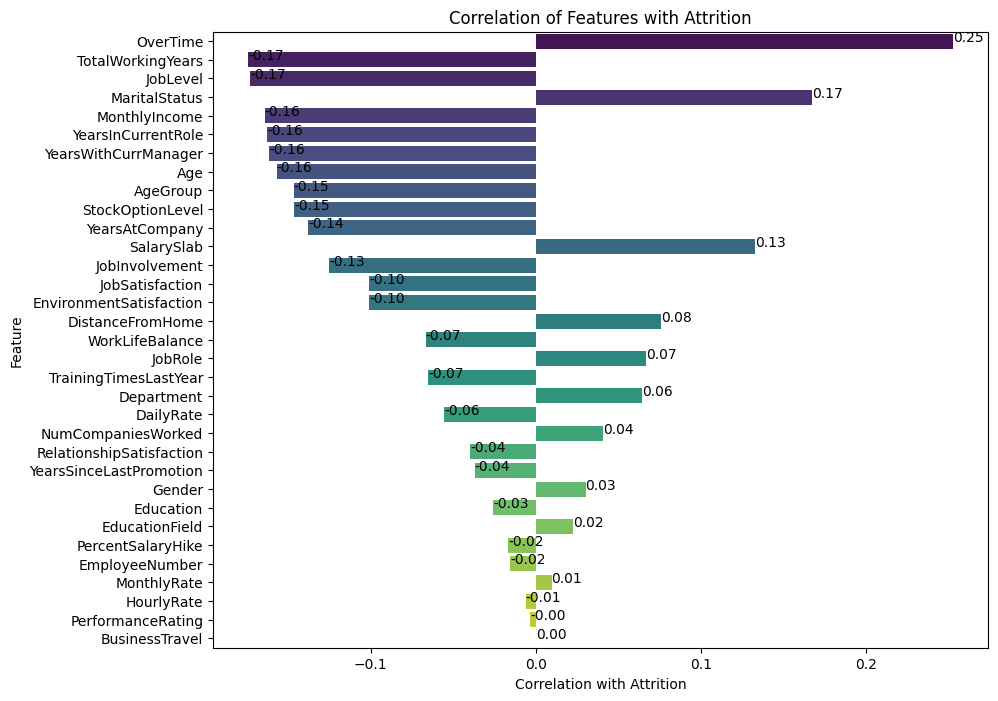

In [61]:
# Exclude the 'Attrition' column
attrition_corr_sorted_no_attrition = attrition_corr_sorted[attrition_corr_sorted['Feature'] != 'Attrition']

# Order by the absolute value of the correlation
attrition_corr_sorted_no_attrition['Absolute Correlation'] = attrition_corr_sorted_no_attrition['Correlation with Attrition'].abs()
attrition_corr_sorted_no_attrition = attrition_corr_sorted_no_attrition.sort_values(by='Absolute Correlation', ascending=False)

# Plot the correlation values
plt.figure(figsize=(10, 8))
sns.barplot(x='Correlation with Attrition', y='Feature', data=attrition_corr_sorted_no_attrition, palette='viridis')

# Add value labels to the bars
for index, value in enumerate(attrition_corr_sorted_no_attrition['Correlation with Attrition']):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left")

plt.title('Correlation of Features with Attrition')
plt.xlabel('Correlation with Attrition')
plt.ylabel('Feature')
plt.show()

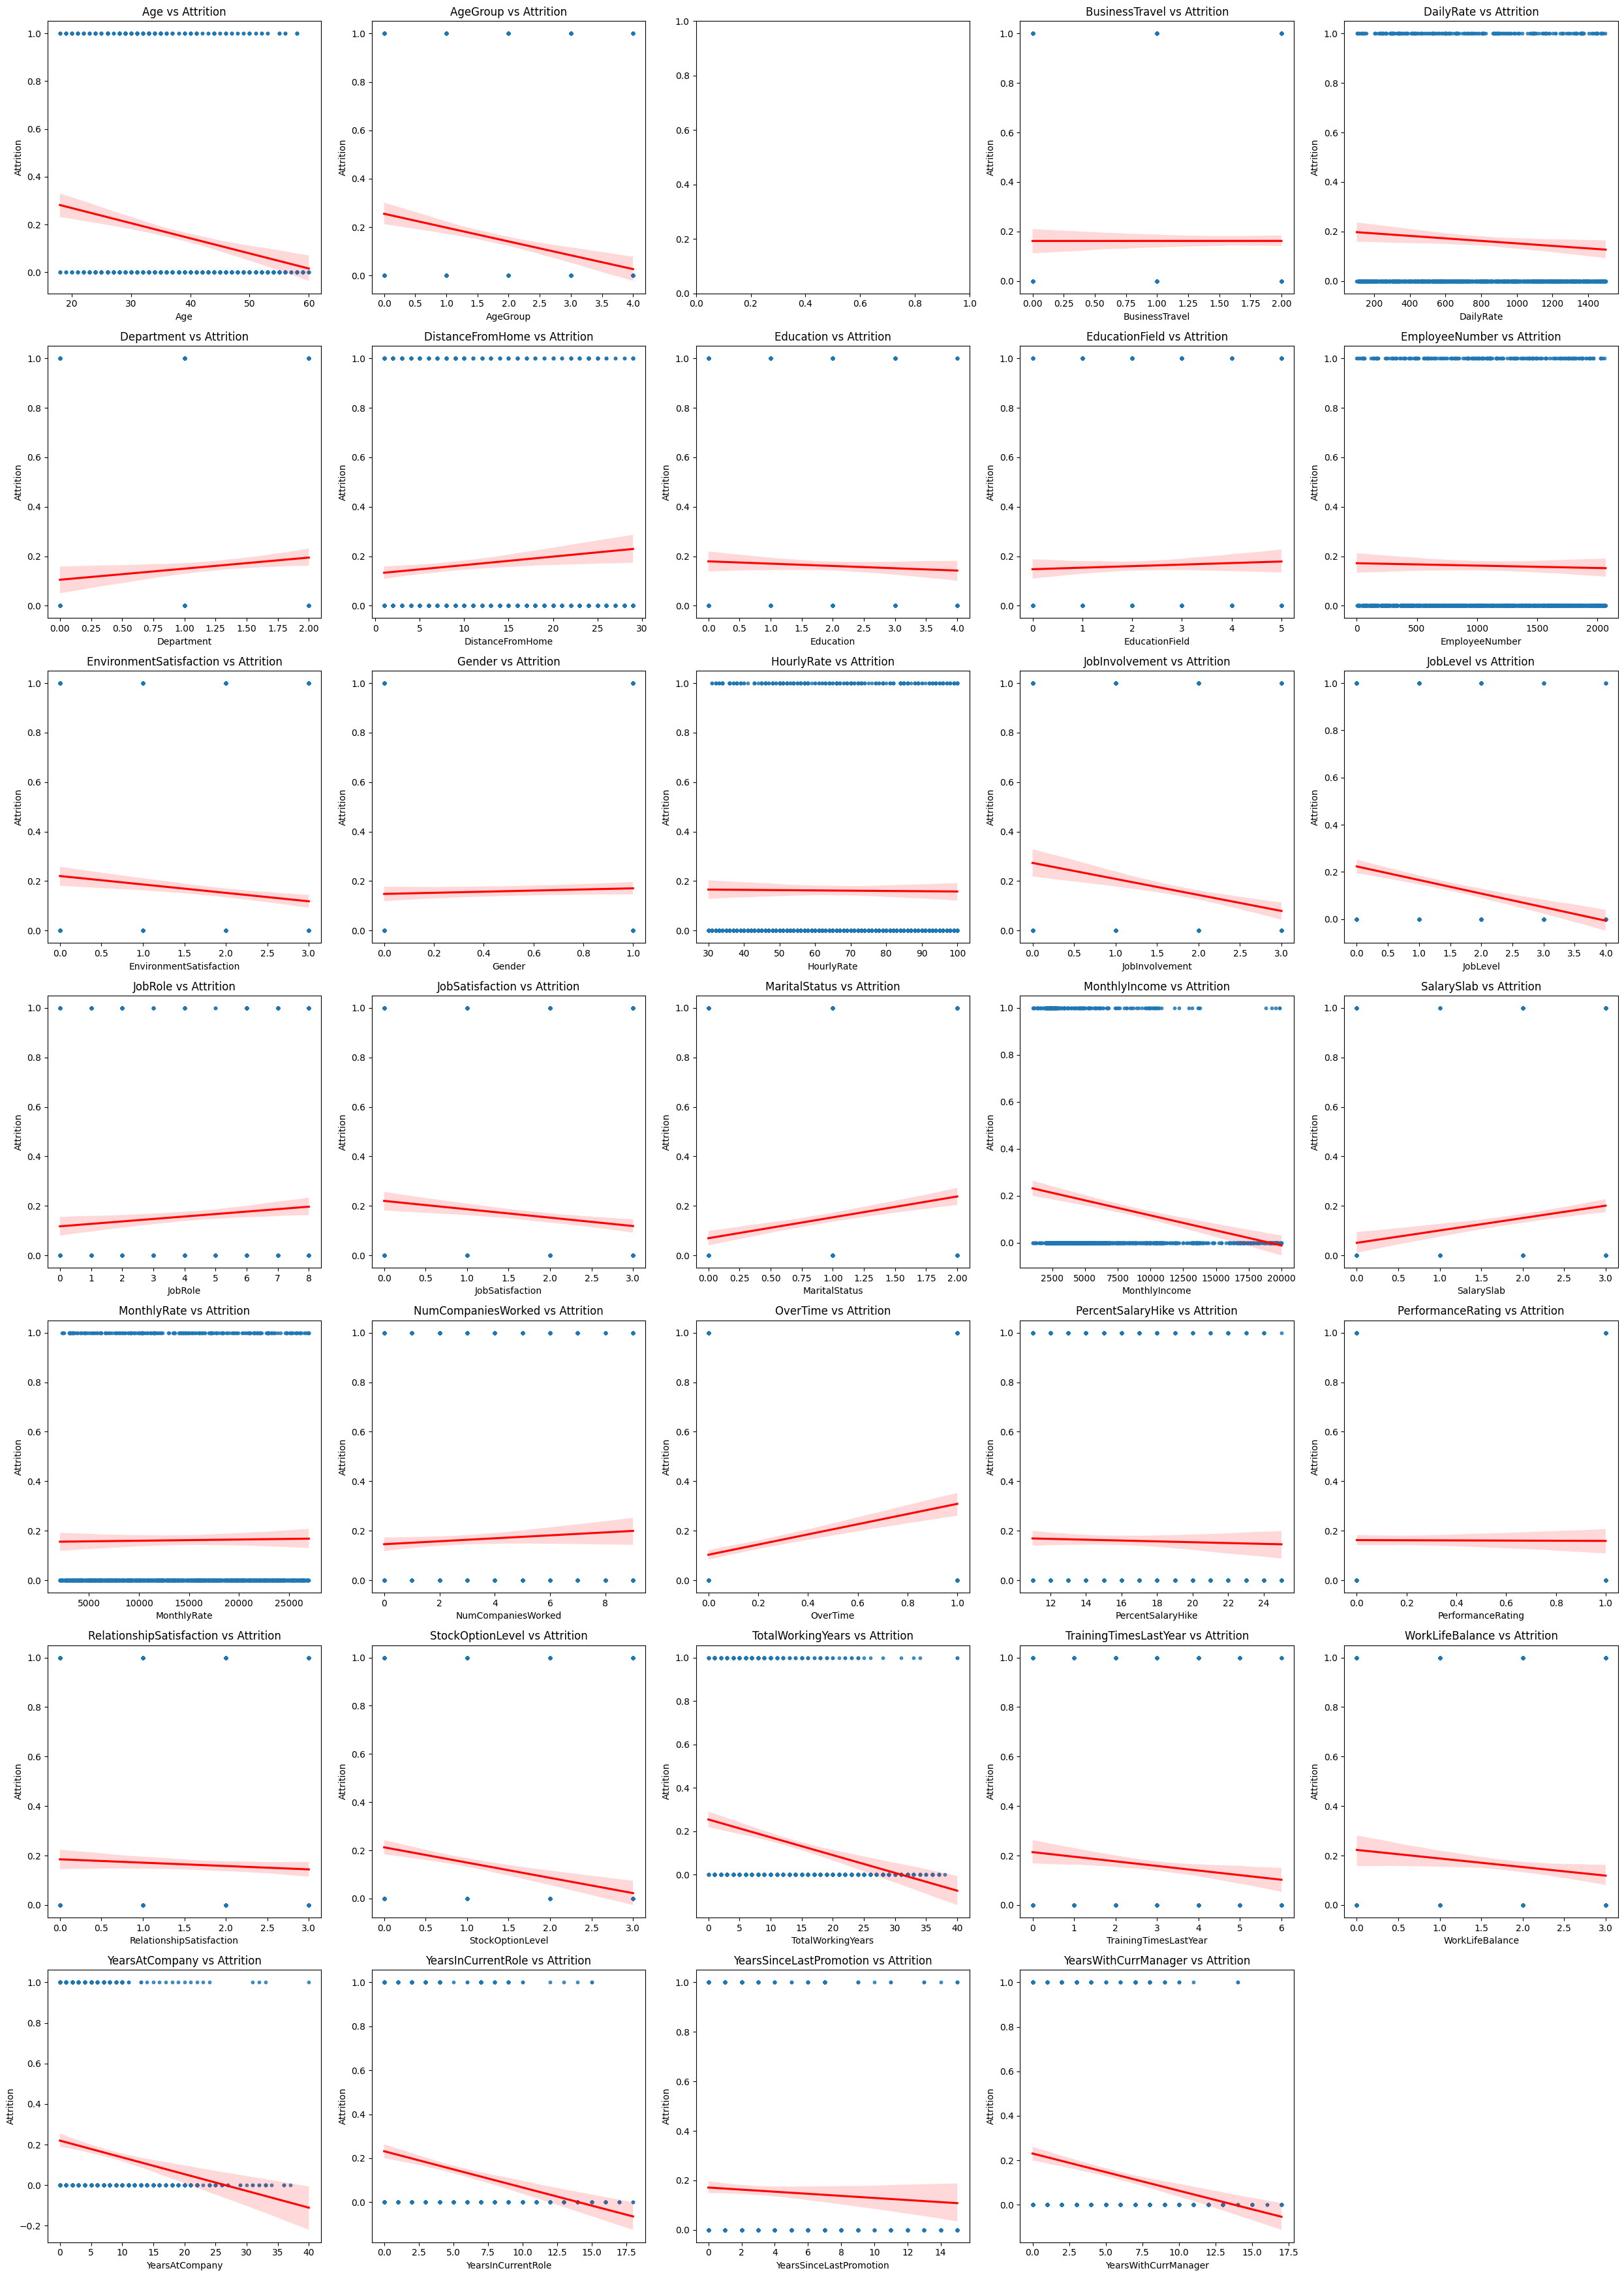

In [37]:
# Create scatter plots with regression lines for each column against Attrition in a compact subplot
num_columns = len(df_encoded.columns) - 1  # Exclude 'Attrition' column
num_rows = (num_columns + 4) // 5  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, 5, figsize=(25, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(df_encoded.columns):
    if column != 'Attrition':
        sns.regplot(x=df_encoded[column], y=df_encoded['Attrition'], scatter_kws={'s':10}, line_kws={'color':'red'}, ax=axes[i])
        axes[i].set_title(f'{column} vs Attrition')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Attrition')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()